In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)

In [9]:
data_head = stroke_data.head()
data_types = stroke_data.dtypes
data_head, data_types

(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 id                     int64
 gend

In [10]:
summary_statistics = stroke_data.describe()
summary_statistics

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
missing_values = stroke_data.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)

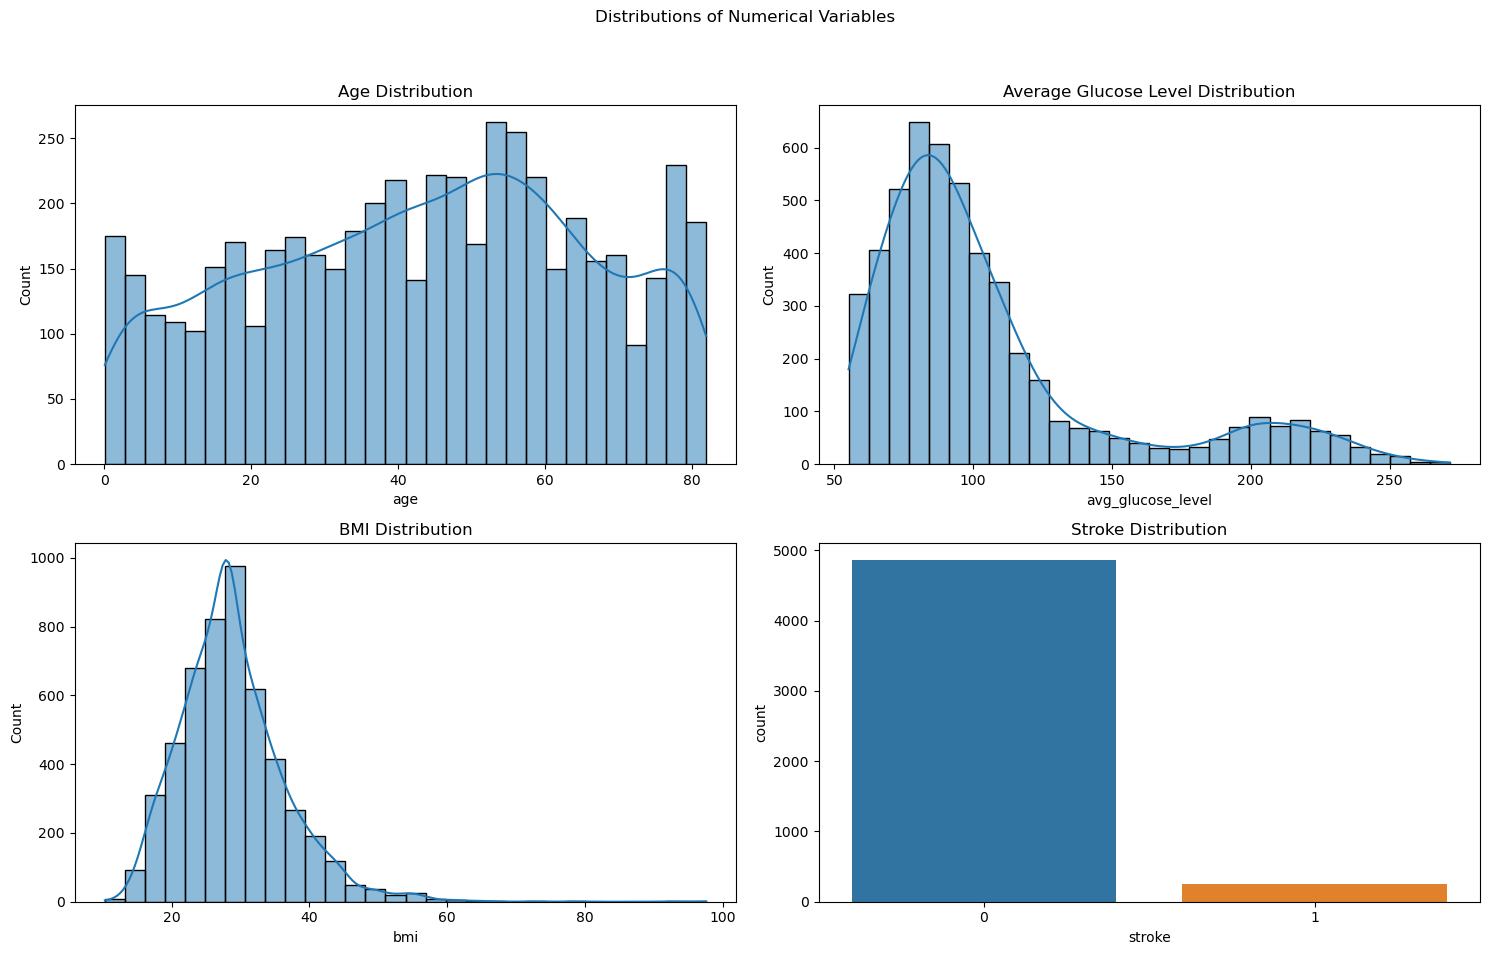

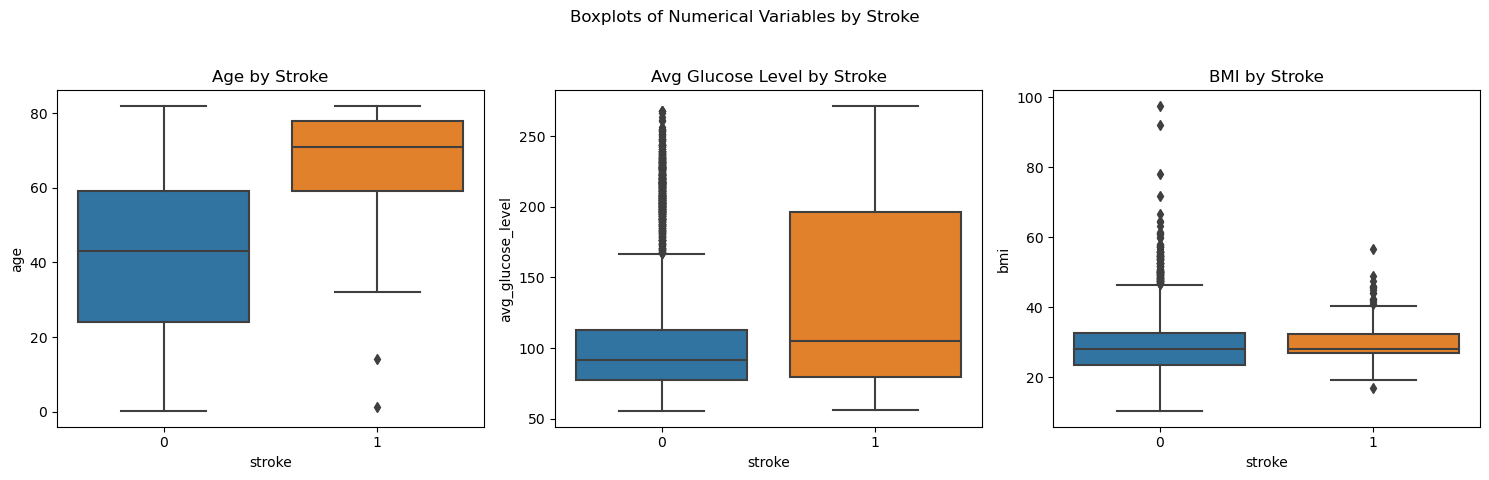

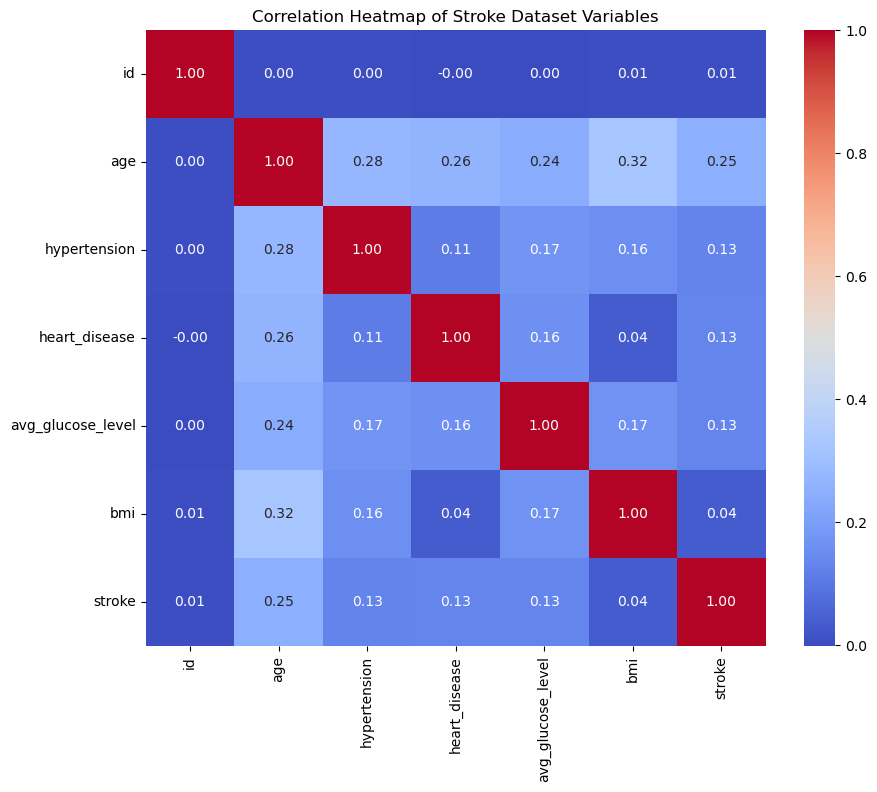

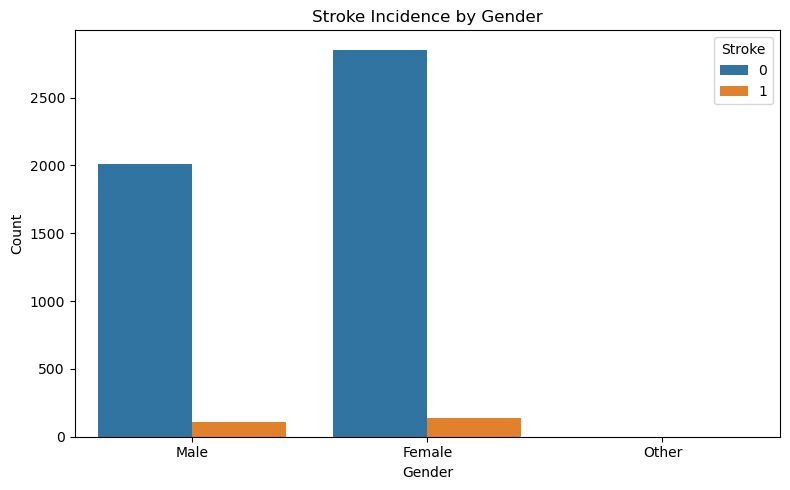

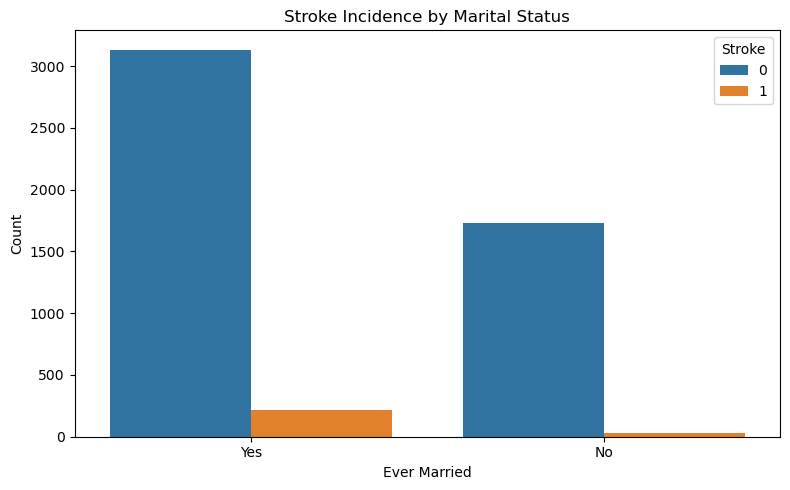

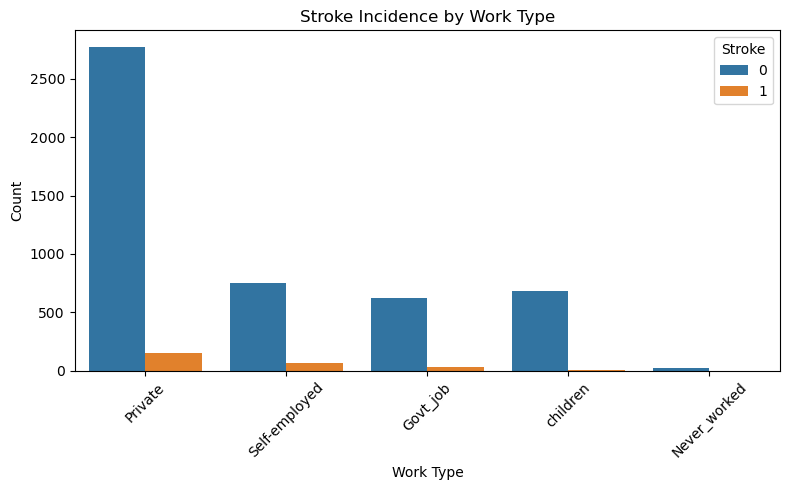

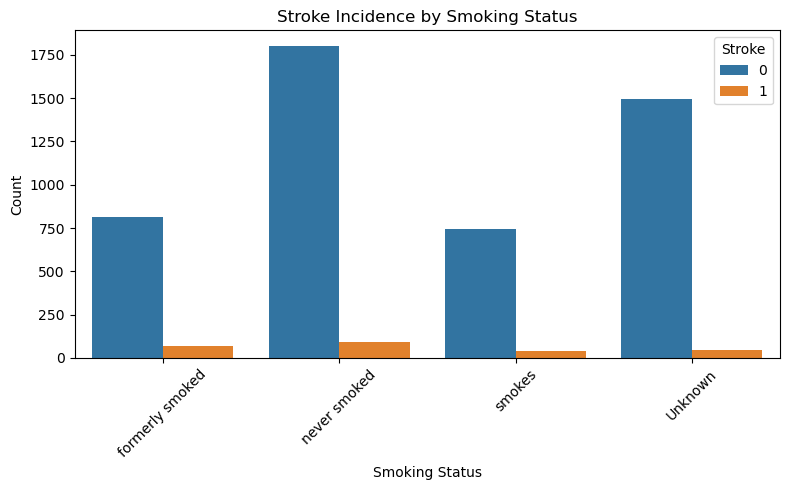

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distributions of Numerical Variables')

sns.histplot(stroke_data['age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

sns.histplot(stroke_data['avg_glucose_level'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Average Glucose Level Distribution')

sns.histplot(stroke_data['bmi'], bins=30, ax=axes[1, 0], kde=True)  # No need to drop NA after imputation
axes[1, 0].set_title('BMI Distribution')

sns.countplot(x='stroke', data=stroke_data, ax=axes[1, 1])
axes[1, 1].set_title('Stroke Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Boxplots of Numerical Variables by Stroke')

sns.boxplot(x='stroke', y='age', data=stroke_data, ax=axes[0])
axes[0].set_title('Age by Stroke')

sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_data, ax=axes[1])
axes[1].set_title('Avg Glucose Level by Stroke')

sns.boxplot(x='stroke', y='bmi', data=stroke_data, ax=axes[2])
axes[2].set_title('BMI by Stroke')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

correlation_matrix = stroke_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Stroke Dataset Variables')

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='stroke', data=stroke_data)
plt.title('Stroke Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.tight_layout()

plt.figure(figsize=(8, 5))
sns.countplot(x='ever_married', hue='stroke', data=stroke_data)
plt.title('Stroke Incidence by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.tight_layout()

plt.figure(figsize=(8, 5))
sns.countplot(x='work_type', hue='stroke', data=stroke_data)
plt.title('Stroke Incidence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', hue='stroke', data=stroke_data)
plt.title('Stroke Incidence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()